In [1]:
import pandas as pd
import numpy as np
import geohash as gh

In [2]:
data = pd.read_csv('training.csv')

In [3]:
data.head(10)

,geohash6,day,timestamp,demand
0,qp03wc,18,20:0,0.020072
1,qp03pn,10,14:30,0.024721
2,qp09sw,9,6:15,0.102821
3,qp0991,32,5:0,0.088755
4,qp090q,15,4:0,0.074468
5,qp03tu,1,12:15,0.023843
6,qp096d,25,3:30,0.007460
7,qp03nr,51,20:45,0.000293
8,qp093r,48,6:15,0.054170
9,qp03r2,4,22:15,0.123463


In [4]:
data.isnull().sum()

geohash6     0
day          0
timestamp    0
demand       0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4206321 entries, 0 to 4206320
Data columns (total 4 columns):
geohash6     object
day          int64
timestamp    object
demand       float64
dtypes: float64(1), int64(1), object(2)
memory usage: 128.4+ MB


In [6]:
data.shape

(4206321, 4)

In [7]:
data['geohash6'] = data.apply(lambda x: gh.decode(x['geohash6']), axis=1)

In [8]:
data.head()

,geohash6,day,timestamp,demand
0,"(-5.35308837890625, 90.6536865234375)",18,20:0,0.020072
1,"(-5.41351318359375, 90.6646728515625)",10,14:30,0.024721
2,"(-5.32562255859375, 90.9063720703125)",9,6:15,0.102821
3,"(-5.35308837890625, 90.7525634765625)",32,5:0,0.088755
4,"(-5.41351318359375, 90.7196044921875)",15,4:0,0.074468


In [9]:
data['geohash6'] = data['geohash6'].apply(str).str.replace(',','.')

In [10]:
data.head()

,geohash6,day,timestamp,demand
0,(-5.35308837890625. 90.6536865234375),18,20:0,0.020072
1,(-5.41351318359375. 90.6646728515625),10,14:30,0.024721
2,(-5.32562255859375. 90.9063720703125),9,6:15,0.102821
3,(-5.35308837890625. 90.7525634765625),32,5:0,0.088755
4,(-5.41351318359375. 90.7196044921875),15,4:0,0.074468


In [11]:
data = data['geohash6'].str.strip('()').str.split('. ', expand=True).rename(columns={0:'Latitude', 1:'Longitude'}).join(data)

In [12]:
data.head()

,Latitude,Longitude,geohash6,day,timestamp,demand
0,-5.35308837890625,90.6536865234375,(-5.35308837890625. 90.6536865234375),18,20:0,0.020072
1,-5.41351318359375,90.6646728515625,(-5.41351318359375. 90.6646728515625),10,14:30,0.024721
2,-5.32562255859375,90.9063720703125,(-5.32562255859375. 90.9063720703125),9,6:15,0.102821
3,-5.35308837890625,90.7525634765625,(-5.35308837890625. 90.7525634765625),32,5:0,0.088755
4,-5.41351318359375,90.7196044921875,(-5.41351318359375. 90.7196044921875),15,4:0,0.074468


In [13]:
# data['Day/Night'] = np.where(pd.to_datetime(data['timestamp'], format='%H:%M').dt.hour < 14, 'Day','Night')

In [14]:
mask = (pd.to_timedelta(data['timestamp'] + ':00').between(pd.Timedelta('6h'), pd.Timedelta('18h')))
data['Day-Night'] = np.where(mask, 'Day', 'Night')

In [15]:
data.head()

,Latitude,Longitude,geohash6,day,timestamp,demand,Day-Night
0,-5.35308837890625,90.6536865234375,(-5.35308837890625. 90.6536865234375),18,20:0,0.020072,Night
1,-5.41351318359375,90.6646728515625,(-5.41351318359375. 90.6646728515625),10,14:30,0.024721,Day
2,-5.32562255859375,90.9063720703125,(-5.32562255859375. 90.9063720703125),9,6:15,0.102821,Day
3,-5.35308837890625,90.7525634765625,(-5.35308837890625. 90.7525634765625),32,5:0,0.088755,Night
4,-5.41351318359375,90.7196044921875,(-5.41351318359375. 90.7196044921875),15,4:0,0.074468,Night


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
data['Day-Night'].value_counts()

Day      2296529
Night    1909792
Name: Day-Night, dtype: int64

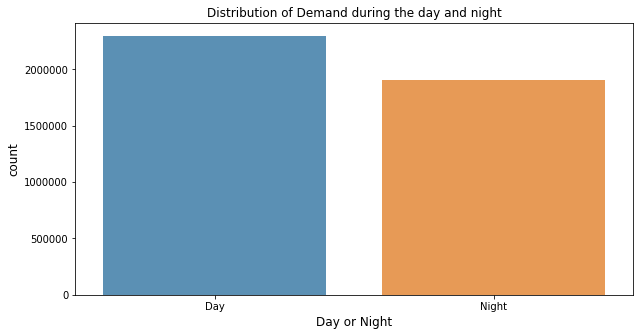

In [20]:
day_night_count = data['Day-Night'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(day_night_count.index, day_night_count.values, alpha=0.8)
plt.title('Distribution of Demand during the day and night')
plt.ylabel('count', fontsize=12)
plt.xlabel('Day or Night', fontsize=12)
plt.show()

In [23]:
len(data.geohash6.unique()) #number of locations in India

1329

In [24]:
#convert timestamp into hours and mins
data['hours'] = data['timestamp'].map(lambda x: int(x.split(':')[0]))
data['mins'] = data['timestamp'].map(lambda x: int(x.split(':')[1]))
data.head()

,Latitude,Longitude,geohash6,day,timestamp,demand,Day-Night,hours,mins
0,-5.35308837890625,90.6536865234375,(-5.35308837890625. 90.6536865234375),18,20:0,0.020072,Night,20,0
1,-5.41351318359375,90.6646728515625,(-5.41351318359375. 90.6646728515625),10,14:30,0.024721,Day,14,30
2,-5.32562255859375,90.9063720703125,(-5.32562255859375. 90.9063720703125),9,6:15,0.102821,Day,6,15
3,-5.35308837890625,90.7525634765625,(-5.35308837890625. 90.7525634765625),32,5:0,0.088755,Night,5,0
4,-5.41351318359375,90.7196044921875,(-5.41351318359375. 90.7196044921875),15,4:0,0.074468,Night,4,0


In [25]:
data[['geohash6', 'demand']].groupby('geohash6').count().head(10)

,demand
geohash6,
(-5.23773193359375. 90.6427001953125),5
(-5.23773193359375. 90.6536865234375),681
(-5.23773193359375. 90.6646728515625),1669
(-5.23773193359375. 90.6756591796875),3169
(-5.23773193359375. 90.6866455078125),3759
(-5.23773193359375. 90.6976318359375),5036
(-5.23773193359375. 90.7086181640625),3772
(-5.23773193359375. 90.7196044921875),2630
(-5.23773193359375. 90.7305908203125),3752


In [26]:
data['time'] = 24*60*(data['day']-1) + 60*data['hours'] + data['mins']

In [27]:
data.head()

,Latitude,Longitude,geohash6,day,timestamp,demand,Day-Night,hours,mins,time
0,-5.35308837890625,90.6536865234375,(-5.35308837890625. 90.6536865234375),18,20:0,0.020072,Night,20,0,25680
1,-5.41351318359375,90.6646728515625,(-5.41351318359375. 90.6646728515625),10,14:30,0.024721,Day,14,30,13830
2,-5.32562255859375,90.9063720703125,(-5.32562255859375. 90.9063720703125),9,6:15,0.102821,Day,6,15,11895
3,-5.35308837890625,90.7525634765625,(-5.35308837890625. 90.7525634765625),32,5:0,0.088755,Night,5,0,44940
4,-5.41351318359375,90.7196044921875,(-5.41351318359375. 90.7196044921875),15,4:0,0.074468,Night,4,0,20400


In [28]:
max_day = data.day.max()
max_time = data.time.max()
train_start = data[data.day==61-13].index[0]
test_start = data[data.time==max_time-15*4].index[0]

X_train = data[['time', 'Latitude','Longitude']].iloc[train_start:test_start,:]
X_test = data[['time', 'Latitude','Longitude']].iloc[test_start:,:]

y_train = data.demand.iloc[train_start:test_start]
y_test = data.demand.iloc[test_start:]

In [29]:
max_day

61

In [30]:
max_time

87825

In [33]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7905, 3)
(4198408, 3)
(7905,)
(4198408,)


In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor(n_estimators=30, max_depth=40)
model.fit(X_train, y_train)
ytest_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, ytest_pred))
print('RMSE:',rmse)

RMSE: 0.11630012630386632


In [38]:
predicted = pd.DataFrame(ytest_pred)

In [50]:
predicted_data = predicted.join(data)

In [51]:
predicted_data.rename(columns={0: 'Predicted_Demand'}, inplace=True)

In [53]:
predicted_data

,Predicted_Demand,Latitude,Longitude,geohash6,day,timestamp,demand,Day-Night,hours,mins,time
0,0.390538,-5.35308837890625,90.6536865234375,(-5.35308837890625. 90.6536865234375),18,20:0,0.020072,Night,20,0,25680
1,0.295385,-5.41351318359375,90.6646728515625,(-5.41351318359375. 90.6646728515625),10,14:30,0.024721,Day,14,30,13830
2,0.122638,-5.32562255859375,90.9063720703125,(-5.32562255859375. 90.9063720703125),9,6:15,0.102821,Day,6,15,11895
3,0.331432,-5.35308837890625,90.7525634765625,(-5.35308837890625. 90.7525634765625),32,5:0,0.088755,Night,5,0,44940
4,0.070767,-5.41351318359375,90.7196044921875,(-5.41351318359375. 90.7196044921875),15,4:0,0.074468,Night,4,0,20400
5,0.022191,-5.33660888671875,90.6097412109375,(-5.33660888671875. 90.6097412109375),1,12:15,0.023843,Day,12,15,735
6,0.024151,-5.39154052734375,90.8184814453125,(-5.39154052734375. 90.8184814453125),25,3:30,0.007460,Night,3,30,34770
7,0.034063,-5.40802001953125,90.6317138671875,(-5.40802001953125. 90.6317138671875),51,20:45,0.000293,Night,20,45,73245
8,0.423934,-5.36407470703125,90.7635498046875,(-5.36407470703125. 90.7635498046875),48,6:15,0.054170,Day,6,15,68055
9,0.029801,-5.40252685546875,90.6756591796875,(-5.40252685546875. 90.6756591796875),4,22:15,0.123463,Night,22,15,5655


In [54]:
print(predicted_data['Predicted_Demand'].max())

0.981615726412119


In [55]:
print(predicted_data['Predicted_Demand'].min())

0.0010221208489885607


In [56]:
predicted_data['Predicted_Demand'].unique()

array([0.39053814, 0.29538487, 0.12263764, ..., 0.11671978, 0.210677  ,
       0.40058922])

In [57]:
predicted_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4198408 entries, 0 to 4198407
Data columns (total 11 columns):
Predicted_Demand    float64
Latitude            object
Longitude           object
geohash6            object
day                 int64
timestamp           object
demand              float64
Day-Night           object
hours               int64
mins                int64
time                int64
dtypes: float64(2), int64(4), object(5)
memory usage: 352.3+ MB


In [59]:
predicted_data['hours'].value_counts()

9     225654
4     225207
5     224081
6     222300
8     221608
3     220342
7     219853
10    219749
2     216557
1     211649
11    210568
12    204222
0     198419
13    190608
14    177040
23    175488
15    154902
22    130685
16    124897
17     98996
21     95402
18     81004
20     76711
19     72466
Name: hours, dtype: int64

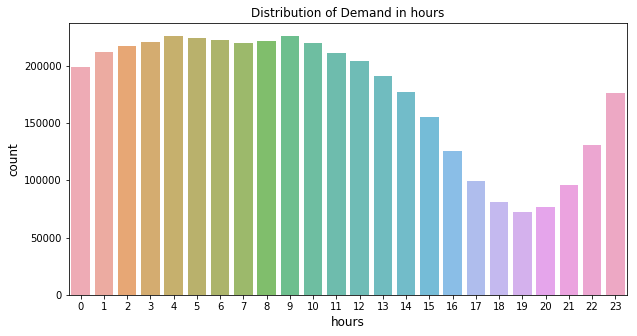

In [63]:
hours = data['hours'].value_counts()
hours = hours.sort_values([''])
plt.figure(figsize=(10,5))
sns.barplot(hours.index, hours.values, alpha=0.8)
plt.title('Distribution of Demand in hours')
plt.ylabel('count', fontsize=12)
plt.xlabel('hours', fontsize=12)
plt.show()